In [113]:
import matplotlib.pyplot as plt
import matplotlib.style
import pandas as pd
import numpy as np
# Set Precision
pd.set_option("precision", 2)
# See available matplotlib styles
matplotlib.style.use('fivethirtyeight')
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_rows", 1500)

In [5]:
# Split and pass into columns
def county_state_split(df):
    df['county'] = df['NAME'].str.split(',').str[0]
    df['state'] = df['NAME'].str.split(',').str[1]
    #df.drop('NAME', inplace=True, axis=1)
    return df

In [ ]:
# Bar plots function
def group_plot(df, col_name, title_name):
    group_df = df.groupby([col_name], as_index=False).agg(
    avg = pd.NamedAgg(column='B19019_001E', aggfunc='mean')
    )
    
    group_df.set_index(col_name, inplace=True)
    
    fig, axes = plt.subplots(2, 1, figsize=(15, 15))
    plt.subplots_adjust(hspace=.9)

    target_1 = axes[0]
    target_2 = axes[1]

    group_df.sort_values(by='avg', ascending=True).head(10).plot(
        kind='bar', 
        ax=target_1, 
        ylabel='Income', 
        title=f'Top 10 Lowest Avg. Median Household Income ({title_name})')
    group_df.sort_values(by='avg', ascending=False).head(10).plot(
        kind='bar', 
        ax=target_2, 
        ylabel='Income', 
        title=f'Top 10 Highest Avg. Median Household Income ({title_name})')

# Median Household Income in the Past 12 Months (B19019)

In [2]:
median_hh_income_DF = pd.read_csv('merged_files/B19019_merged.csv')

In [3]:
median_hh_income_DF.head()

,NAME,B19019_001E,state,county,year
0,"Washington County, Mississippi",30834.0,28,151,2018
1,"Perry County, Mississippi",39007.0,28,111,2018
2,"Choctaw County, Mississippi",37203.0,28,19,2018
3,"Itawamba County, Mississippi",40510.0,28,57,2018
4,"Carroll County, Mississippi",43060.0,28,15,2018


In [6]:
median_hh_income_DF = county_state_split(median_hh_income_DF)

In [7]:
# Drop nan and PR
median_hh_income_DF.state.unique()

array([' Mississippi', ' Missouri', ' Montana', ' Nebraska', ' Nevada',
       ' New Hampshire', ' New Jersey', ' New Mexico', ' New York',
       ' North Carolina', ' North Dakota', ' Ohio', ' Minnesota',
       ' Texas', ' Utah', ' Vermont', ' Virginia', ' West Virginia',
       ' Washington', ' Wisconsin', ' Wyoming', ' Puerto Rico',
       ' Alabama', ' Alaska', ' Arizona', ' Arkansas', ' Oklahoma',
       ' Oregon', ' Pennsylvania', ' Rhode Island', ' South Carolina',
       ' South Dakota', ' Tennessee', ' Iowa', ' Kansas', ' Kentucky',
       ' Louisiana', ' Maine', ' Maryland', ' Massachusetts', ' Michigan',
       ' California', ' Colorado', ' Connecticut', ' Delaware',
       ' District of Columbia', ' Florida', ' Georgia', ' Idaho',
       ' Hawaii', ' Illinois', ' Indiana', nan], dtype=object)

In [8]:
median_hh_income_DF.dropna(subset=['state'], inplace=True) # removes states that are NA
median_hh_income_DF = median_hh_income_DF[median_hh_income_DF['state'] != ' Puerto Rico'] # Removes PR

In [9]:
# Get count of observations per year & avg hh income
median_hh_yearGroup = median_hh_income_DF.groupby('year', as_index=False).agg(
    Count = pd.NamedAgg(column='state', aggfunc='count'),
    avg_hh_income = pd.NamedAgg(column='B19019_001E', aggfunc='mean')
)
median_hh_yearGroup

,year,Count,avg_hh_income
0,2009,3142,43457.92
1,2010,3143,44270.30
2,2011,3143,45292.07
3,2012,3143,45644.41
4,2013,3143,45937.12
5,2014,3142,46543.76
6,2015,3142,48399.33
7,2016,3142,47973.23
8,2017,3142,49754.16
9,2018,3142,51583.18


In [10]:
# Plot avg_hh_income over the years
median_hh_yearGroup.set_index('year', inplace=True)

<AxesSubplot:xlabel='year'>

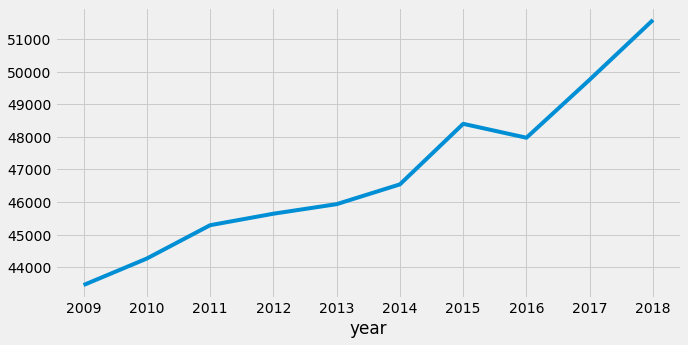

In [11]:
median_hh_yearGroup['avg_hh_income'].plot(
    xticks = median_hh_yearGroup.index,
    figsize = (10, 5)
)

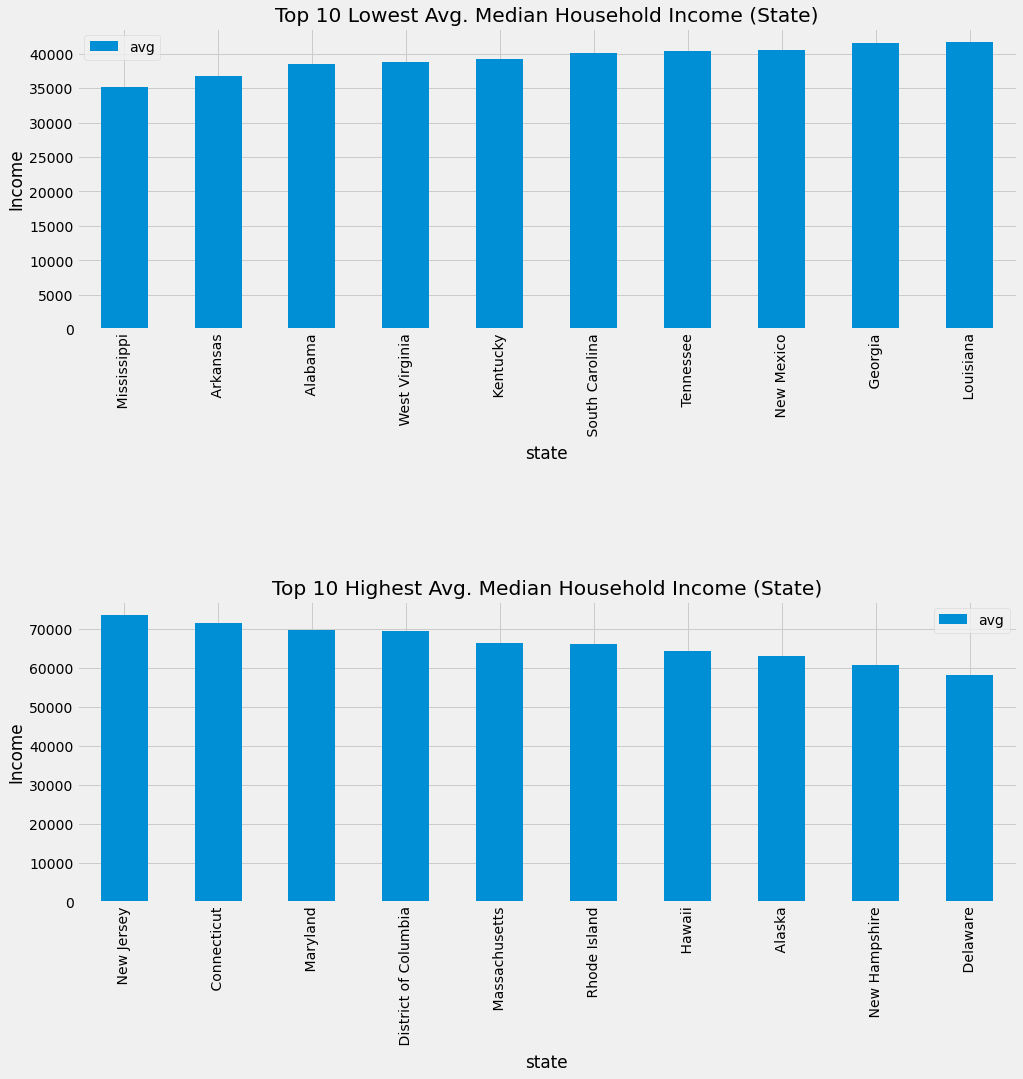

In [13]:
# Get averages per state
group_plot(median_hh_income_DF, 'state', 'State')

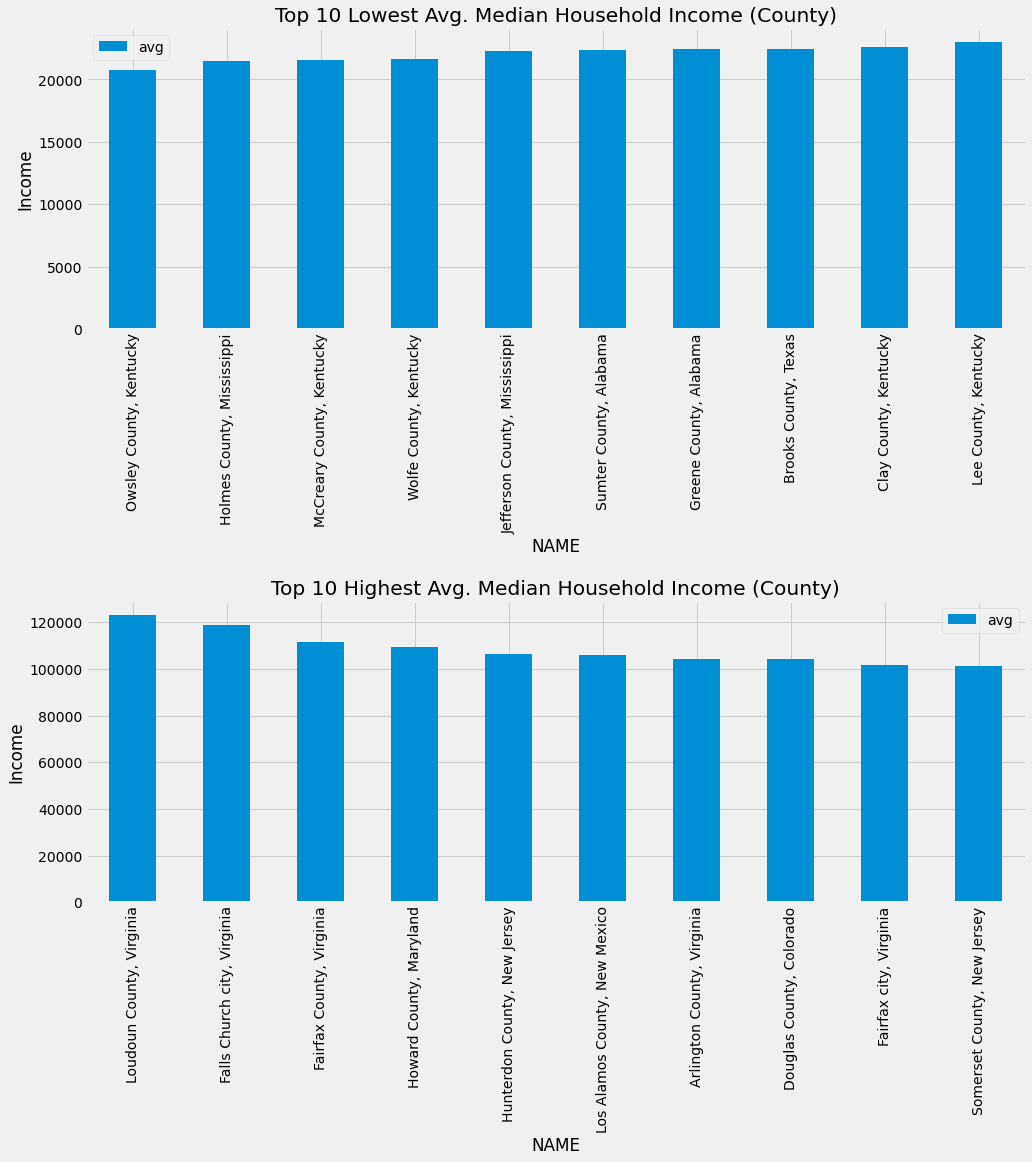

In [14]:
# Get averages per county
group_plot(median_hh_income_DF, 'NAME', 'County')

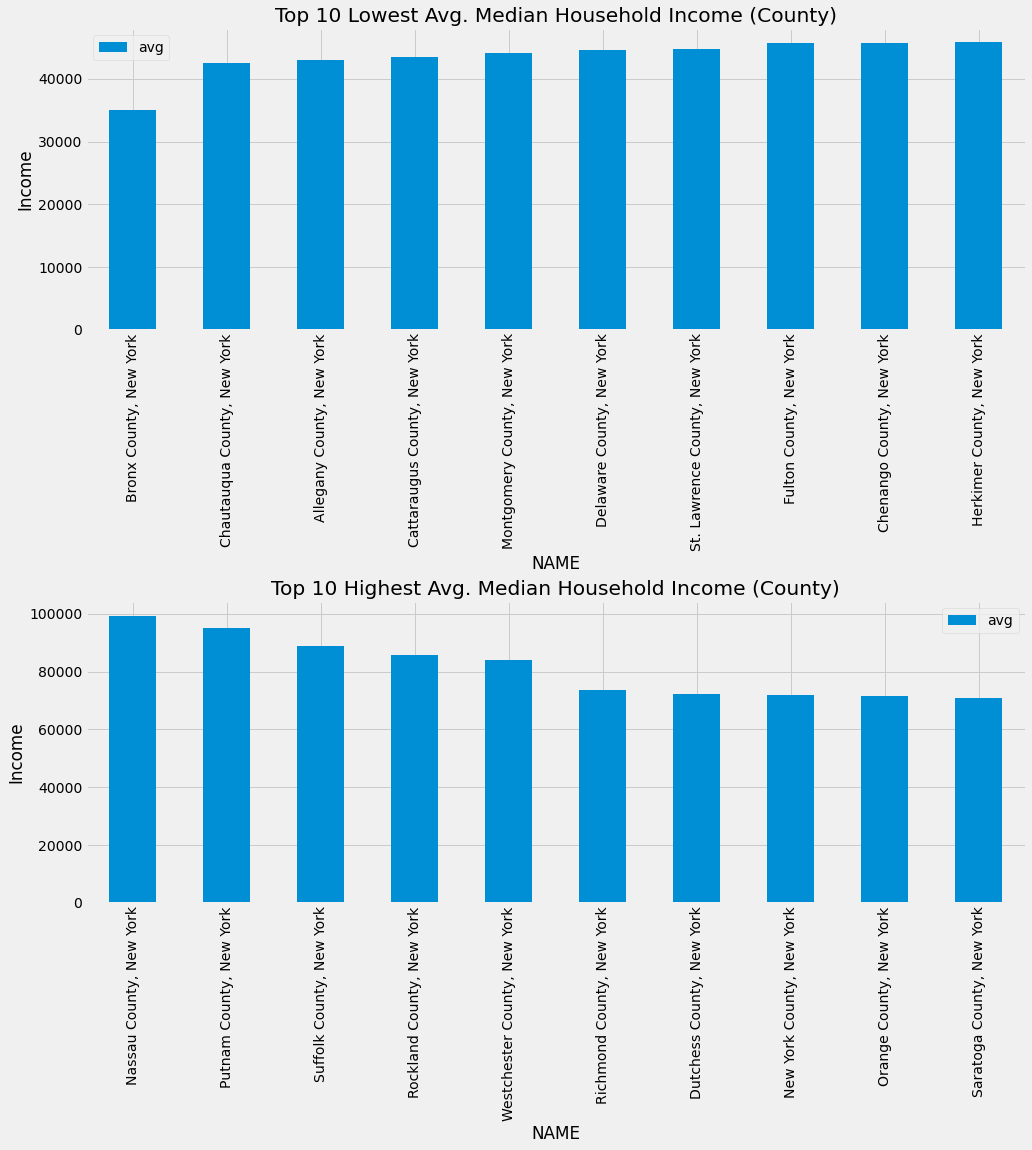

In [15]:
# New York Counties
ny_DF = median_hh_income_DF[median_hh_income_DF['state'].isin([' New York'])]
group_plot(ny_DF, 'NAME', 'County')

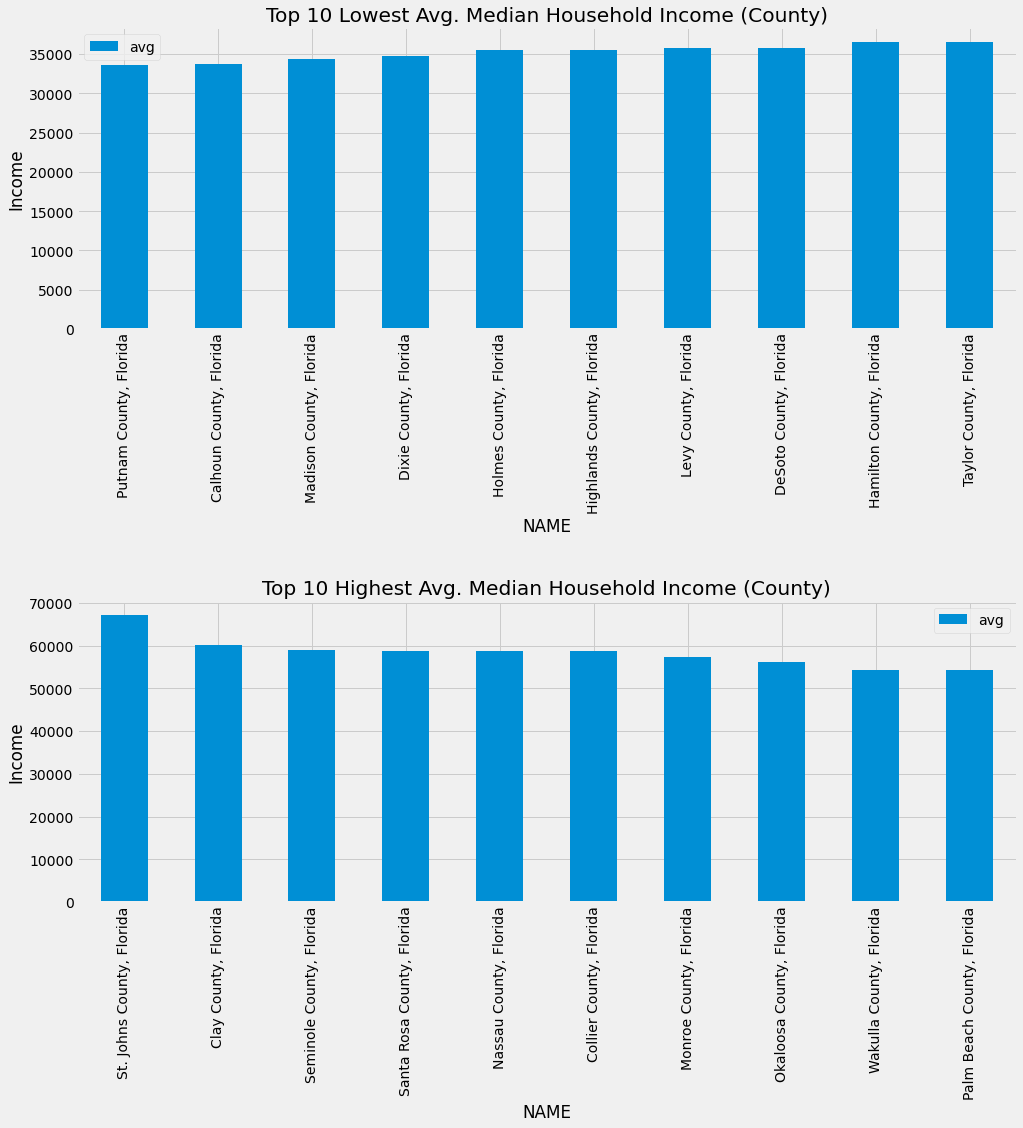

In [16]:
# Florida Counties
fl_DF = median_hh_income_DF[median_hh_income_DF['state'].isin([' Florida'])]
group_plot(fl_DF, 'NAME', 'County')

In [17]:
ny_fl_DF = median_hh_income_DF[median_hh_income_DF['state'].isin([' New York',' Florida'])]

In [22]:
# Number of counties we are working with for NY and FL 
ny_fl_DF.shape

(1290, 5)

# Educational Attainment

In [92]:
# read in education and population data
ed_attn_df = pd.read_csv('merged_files/B15001_merged.csv')
pop_df = pd.read_csv('merged_files/PopulationEstimates(Cleaned).csv')

In [93]:
ed_attn_df = county_state_split(ed_attn_df)

In [94]:
#Clean white space for state
ed_attn_df['state'] = ed_attn_df['state'].str.lstrip() 

In [95]:
#Filter out PR and 2009 since pop data only for 2010-2018
ed_attn_df = ed_attn_df[(ed_attn_df['year'] != 2009) & (ed_attn_df['state'] != 'Puerto Rico')]

In [96]:
# Group with population data
ed_attn_joined = pd.merge(ed_attn_df, pop_df, how='left', on=['state', 'county', 'year'])

In [97]:
ed_attn_joined['population']=ed_attn_joined['population'].str.split(',').str.join('').astype('float') 

In [98]:
## Calculate percentage
ed_attn_joined['percent'] = (ed_attn_joined['B15001_001E'] / ed_attn_joined['population']) * 100

In [120]:
# Store dropped rows for now
dropped = ed_attn_joined[ed_attn_joined.population.isnull()]

In [122]:
ed_attn_joined.dropna(subset=['percent'], inplace=True)

In [130]:
ny_ed = ed_attn_joined[ed_attn_joined['state'].isin(['New York'])]
ny_ed.groupby(['county'], as_index= False)['percent'].mean().sort_values(by='percent')

,county,percent
43,Rockland County,71.36
35,Orange County,73.10
2,Bronx County,73.28
22,Jefferson County,75.66
23,Kings County,75.85
59,Westchester County,76.22
24,Lewis County,76.42
61,Yates County,76.49
42,Richmond County,76.90
51,Suffolk County,77.03
